In [95]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline

In [96]:
import os

In [97]:
df =pd.read_csv('D:/predictive main/train_label.csv')

In [98]:
df.head()

,date,label
0,3/5/2015,NaN
1,4/5/2015,0.0
2,5/5/2015,0.0
3,6/5/2015,0.0
4,7/5/2015,0.0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    684 non-null    object 
 1   label   683 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.8+ KB


In [100]:
df.tail(20)

,date,label
664,5/3/2017,0.0
665,6/3/2017,0.0
666,7/3/2017,0.0
667,8/3/2017,0.0
668,9/3/2017,0.0
669,10/3/2017,0.0
670,11/3/2017,1.0
671,12/3/2017,0.0
672,13/3/2017,0.0
673,14/3/2017,0.0


In [101]:
df.describe()

,label
count,683.000000
mean,0.064422
std,0.245683
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [102]:
df.isnull().sum()

date     0
label    1
dtype: int64

In [103]:
df[df['label']==1].count()

date     44
label    44
dtype: int64

In [104]:
df[df['label']==0].count()

date     639
label    639
dtype: int64

In [105]:
from datetime import datetime
data = [go.Scatter(x=df.date, y=df['label'])]

py.iplot(data, filename = 'time-series-simple')

In [106]:
df.fillna(0,inplace=True)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    684 non-null    object 
 1   label   684 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.8+ KB


In [108]:
X=df.drop('label',axis=1)
y=df.label
X.head()
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: label, dtype: float64

In [109]:
X.head()

,date
0,3/5/2015
1,4/5/2015
2,5/5/2015
3,6/5/2015
4,7/5/2015


In [110]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: label, dtype: float64

In [111]:
import datetime as dt
X['date'] = pd.to_datetime(X['date'])
X['date']=X['date'].map(dt.datetime.toordinal)

X['date'].head()

0    735662
1    735693
2    735723
3    735754
4    735784
Name: date, dtype: int64

In [112]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=60,test_size=0.20) 

In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
target = X['date']

In [115]:
scaler = StandardScaler()

In [116]:
features = scaler.fit_transform(X)

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
lr = LogisticRegression(random_state=0)

In [119]:
model = lr.fit(X_train,y_train)

In [120]:
predict = model.predict(X_test)

In [121]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, predict)
roc_auc

0.5

In [122]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict)
cm

array([[129,   0],
       [  8,   0]], dtype=int64)

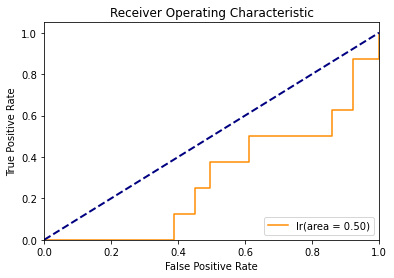

In [123]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='lr(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [124]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=15)
predic = model.fit(X_train,y_train).predict(X_test)

In [125]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, predic)
roc_auc

0.5

In [126]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predic)
cm

array([[129,   0],
       [  8,   0]], dtype=int64)

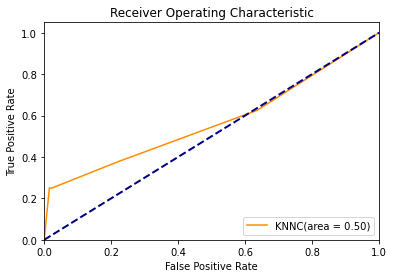

In [127]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='KNNC(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [128]:
from sklearn.tree import DecisionTreeClassifier
decision=DecisionTreeClassifier()
decision.fit(X_train,y_train)

DecisionTreeClassifier()

In [129]:
y_predict=decision.predict(X_test)

In [130]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_predict)
roc_auc

0.6094961240310077

In [131]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[125,   4],
       [  6,   2]], dtype=int64)

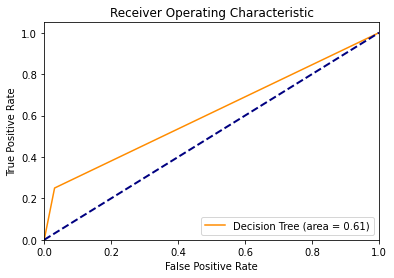

In [132]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
fpr, tpr, thresholds = roc_curve(y_test, decision.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='Decision Tree (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [133]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier()
random.fit(X_train,y_train)


RandomForestClassifier()

In [134]:
pre=random.predict(X_test)


In [135]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, pre)
roc_auc

0.6094961240310077

In [136]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pre)
cm

array([[125,   4],
       [  6,   2]], dtype=int64)

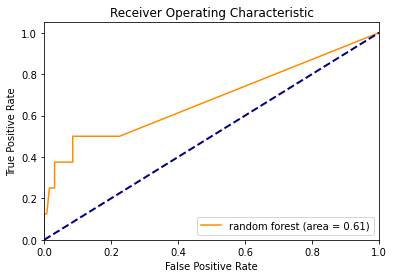

In [137]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
fpr, tpr, thresholds = roc_curve(y_test, random.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='random forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [138]:
from xgboost import XGBClassifier

In [139]:
model_1 = XGBClassifier()
pred = model_1.fit(X_train,y_train).predict(X_test)

In [140]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, pred)
roc_auc

0.6172480620155039

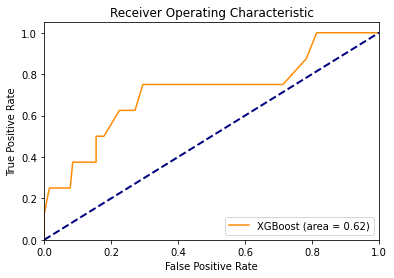

In [141]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
fpr, tpr, thresholds = roc_curve(y_test, model_1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='XGBoost (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()